# NumPy for Scientific Computing

| Information | Details |
|----------|---------|
| Learning Objectives | • Create and manipulate NumPy arrays efficiently<br>• Perform vectorized operations instead of loops<br>• Apply statistical analysis to datasets<br>• Work with matrices and linear algebra<br>• Handle complex numbers for engineering calculations<br>• Transition smoothly from MATLAB to Python |
| Prerequisites | Python fundamentals, basic linear algebra |
| Estimated Time | 90 minutes |
| Topics | Arrays, vectorization, broadcasting, linear algebra, complex numbers, performance optimization |

## Introduction

NumPy is the foundation of scientific computing in Python. While Python lists are flexible and easy to use, they're inefficient for numerical calculations. NumPy provides powerful N-dimensional arrays that enable fast, vectorized operations essential for scientific and engineering applications.

This lesson introduces NumPy through practical examples, starting with basic array operations and progressing to advanced topics like linear algebra and signal processing. You'll learn not just the syntax, but also the performance benefits and best practices that make NumPy indispensable for numerical computing.

```{admonition} Why NumPy Matters
:class: info
NumPy arrays use contiguous memory and optimized C implementations, making them 10-100x faster than pure Python for numerical operations. This performance is crucial when processing large datasets or performing complex calculations.
```

## Setting Up

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Set display precision for cleaner output
np.set_printoptions(precision=2, suppress=True)

print(f"NumPy version: {np.__version__}")

NumPy version: 2.0.2


## Performance Motivation

Before diving into NumPy's features, let's see why it's essential for scientific computing. We'll compare calculating the sum of squares for a large dataset using pure Python versus NumPy.

In [2]:
# Create test data
n = 1_000_000
python_list = list(range(n))
numpy_array = np.arange(n)

In [3]:
# Pure Python approach
start = time.time()
python_sum = sum(x**2 for x in python_list)
python_time = time.time() - start

print(f"Python time: {python_time*1000:.1f} ms")

Python time: 21.2 ms


In [4]:
# NumPy approach
start = time.time()
numpy_sum = np.sum(numpy_array**2)
numpy_time = time.time() - start

print(f"NumPy time: {numpy_time*1000:.1f} ms")
print(f"Speed improvement: {python_time/numpy_time:.0f}x faster")

NumPy time: 4.9 ms
Speed improvement: 4x faster


This dramatic speed improvement comes from NumPy's vectorized operations and efficient memory layout. Now let's learn how to harness this power.

## MATLAB to NumPy Transition Guide

If you're coming from MATLAB, this guide will help you transition to NumPy. While the concepts are similar, the syntax and some behaviors differ significantly.

```{admonition} Critical Difference: Indexing
:class: warning
The biggest adjustment for MATLAB users is zero-based indexing. In NumPy, the first element is at index 0, not 1. This affects all array operations and slicing.
```

### Quick Reference Table

| Operation | MATLAB | NumPy | Notes |
|-----------|--------|-------|-------|
| Create row vector | `a = [1 2 3]` | `a = np.array([1, 2, 3])` | NumPy requires explicit array creation |
| Create column vector | `a = [1; 2; 3]` | `a = np.array([[1], [2], [3]])` | Use nested lists for 2D |
| Matrix multiply | `A * B` | `A @ B` or `np.dot(A, B)` | @ operator (Python 3.5+) |
| Element-wise multiply | `A .* B` | `A * B` | NumPy defaults to element-wise |
| Matrix transpose | `A'` | `A.T` or `np.transpose(A)` | Use .T attribute |
| Matrix inverse | `inv(A)` | `np.linalg.inv(A)` | In linalg submodule |
| First element | `A(1)` | `A[0]` | Zero-based indexing |
| Last element | `A(end)` | `A[-1]` | Negative indexing from end |
| Slice rows 1-3 | `A(1:3, :)` | `A[0:3, :]` or `A[:3, :]` | End index is exclusive |
| Size of array | `size(A)` | `A.shape` | Returns tuple |
| Length of vector | `length(v)` | `len(v)` or `v.size` | Use size for total elements |
| Concatenate | `[A B]` or `[A; B]` | `np.hstack()` or `np.vstack()` | Specify axis explicitly |
| Zeros | `zeros(3, 4)` | `np.zeros((3, 4))` | Shape as tuple |
| Identity matrix | `eye(n)` | `np.eye(n)` | Same name |
| Random matrix | `rand(3, 4)` | `np.random.rand(3, 4)` | No parentheses for shape |
| Find indices | `find(A > 5)` | `np.where(A > 5)` | Returns tuple of arrays |
| Reshape | `reshape(A, 3, 4)` | `A.reshape(3, 4)` | Method on array |
| Max value | `max(A)` | `np.max(A)` or `A.max()` | Function or method |

### Key Behavioral Differences

Beyond syntax, there are important conceptual differences between MATLAB and NumPy that affect how you write code.

#### 1. Array Creation Defaults

In [5]:
# MATLAB: [1 2 3] creates a row vector
# NumPy: creates 1D array (neither row nor column)
a = np.array([1, 2, 3])
print(f"1D array shape: {a.shape}")  # (3,) not (1,3) or (3,1)

1D array shape: (3,)


In [6]:
# To create explicit row or column vectors:
row_vector = np.array([[1, 2, 3]])  # Shape (1, 3)
col_vector = np.array([[1], [2], [3]])  # Shape (3, 1)

print(f"Row vector shape: {row_vector.shape}")
print(f"Column vector shape: {col_vector.shape}")

Row vector shape: (1, 3)
Column vector shape: (3, 1)


#### 2. Copy vs View Behavior

In [7]:
# NumPy slices are views, not copies!
original = np.array([1, 2, 3, 4, 5])
slice_view = original[1:4]
slice_view[0] = 99  # This modifies the original!

print(f"Original array: {original}")
print(f"Slice is a view: {slice_view}")

Original array: [ 1 99  3  4  5]
Slice is a view: [99  3  4]


In [8]:
# Use copy() to create independent arrays
original = np.array([1, 2, 3, 4, 5])
slice_copy = original[1:4].copy()
slice_copy[0] = 99  # Original is unchanged

print(f"Original array: {original}")
print(f"Independent copy: {slice_copy}")

Original array: [1 2 3 4 5]
Independent copy: [99  3  4]


```{admonition} MATLAB Note: Automatic Copying
:class: note
MATLAB automatically creates copies when you slice arrays. NumPy creates views for efficiency. Always use `.copy()` if you need an independent array.
```

## NumPy Fundamentals

Now let's explore the core concepts of NumPy, starting with array creation and basic operations. We'll use simple examples first, then gradually introduce more complex scenarios.

### Creating Arrays

NumPy provides multiple ways to create arrays, each suited for different purposes.

In [9]:
# From Python lists
from_list = np.array([1, 2, 3, 4, 5])
print(f"From list: {from_list}")

# From nested lists (2D array)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
print(f"\n2D array:\n{matrix}")

From list: [1 2 3 4 5]

2D array:
[[1 2 3]
 [4 5 6]]


In [10]:
# Using built-in functions
zeros = np.zeros(5)  # 1D array of zeros
ones = np.ones((2, 3))  # 2D array of ones
identity = np.eye(3)  # Identity matrix

print(f"Zeros: {zeros}")
print(f"\nOnes:\n{ones}")
print(f"\nIdentity:\n{identity}")

Zeros: [0. 0. 0. 0. 0.]

Ones:
[[1. 1. 1.]
 [1. 1. 1.]]

Identity:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [11]:
# Sequences and ranges
sequence = np.arange(0, 10, 2)  # Start, stop, step
linear_space = np.linspace(0, 1, 5)  # 5 points from 0 to 1

print(f"Sequence (arange): {sequence}")
print(f"Linear space: {linear_space}")

Sequence (arange): [0 2 4 6 8]
Linear space: [0.   0.25 0.5  0.75 1.  ]


### Array Properties

Understanding array properties is crucial for debugging and optimization.

In [12]:
arr = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]])

print(f"Shape: {arr.shape}")  # (rows, columns)
print(f"Size: {arr.size}")  # Total elements
print(f"Dimensions: {arr.ndim}")  # Number of dimensions
print(f"Data type: {arr.dtype}")  # Element type
print(f"Item size: {arr.itemsize} bytes")  # Bytes per element
print(f"Total memory: {arr.nbytes} bytes")  # Total memory usage

Shape: (3, 4)
Size: 12
Dimensions: 2
Data type: int64
Item size: 8 bytes
Total memory: 96 bytes


```{admonition} Tip: Memory Efficiency
:class: tip
Choose appropriate data types to save memory. Use `float32` instead of `float64` when high precision isn't needed, or `int8` for small integers.
```

### Basic Operations

NumPy operations are element-wise by default, making mathematical expressions natural and efficient.

In [13]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

# Arithmetic operations
print(f"Addition: {a + b}")
print(f"Multiplication: {a * b}")  # Element-wise!
print(f"Power: {a ** 2}")

Addition: [ 6  8 10 12]
Multiplication: [ 5 12 21 32]
Power: [ 1  4  9 16]


In [14]:
# Mathematical functions
angles = np.array([0, np.pi/4, np.pi/2, np.pi])

print(f"Sine: {np.sin(angles)}")
print(f"Exponential: {np.exp([0, 1, 2])}")
print(f"Square root: {np.sqrt([1, 4, 9, 16])}")

Sine: [0.   0.71 1.   0.  ]
Exponential: [1.   2.72 7.39]
Square root: [1. 2. 3. 4.]


In [15]:
# Aggregation functions
data = np.array([3, 7, 1, 9, 2, 5])

print(f"Sum: {np.sum(data)}")
print(f"Mean: {np.mean(data)}")
print(f"Standard deviation: {np.std(data):.2f}")
print(f"Maximum: {np.max(data)}")
print(f"Argmax (index of max): {np.argmax(data)}")

Sum: 27
Mean: 4.5
Standard deviation: 2.81
Maximum: 9
Argmax (index of max): 3


### Exercise 1: Array Creation and Operations

Real sensor measurements always contain noise from electrical interference or thermal effects. In this exercise, you'll create a synthetic noisy signal that mimics real-world data acquisition by combining a clean periodic signal with random noise.

Create a time array of 100 points spanning 1 second using `np.linspace(0, 1, 100)`. This gives you a 100 Hz sampling rate. Generate a sine wave with frequency 5 Hz and amplitude 2 using the formula A*sin(2πft). Then add Gaussian noise with zero mean and standard deviation 0.1 using `np.random.normal()` to simulate measurement errors.

Calculate three statistics for your noisy signal: the mean (reveals DC offset), standard deviation (quantifies spread), and peak-to-peak amplitude using `np.ptp()` (shows the signal's full range). These metrics help you understand how noise affects your measurements.

**Hint:** Set `np.random.seed(42)` for reproducible noise. Structure your code logically: create time array, generate clean signal with `2 * np.sin(2 * np.pi * 5 * t)`, add noise, calculate statistics, then plot.

In [16]:
# Exercise 1: Your code here

### Solution to Exercise 1

In [17]:
# Create time array
t = np.linspace(0, 1, 100)  # 100 points over 1 second
frequency = 5  # Hz
amplitude = 2

# Generate clean sine wave
clean_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Add noise
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 0.1, len(t))
noisy_signal = clean_signal + noise

# Calculate statistics
print(f"Mean: {np.mean(noisy_signal):.3f}")
print(f"Standard deviation: {np.std(noisy_signal):.3f}")
print(f"Peak-to-peak: {np.ptp(noisy_signal):.3f}")

Mean: -0.010
Standard deviation: 1.421
Peak-to-peak: 4.349


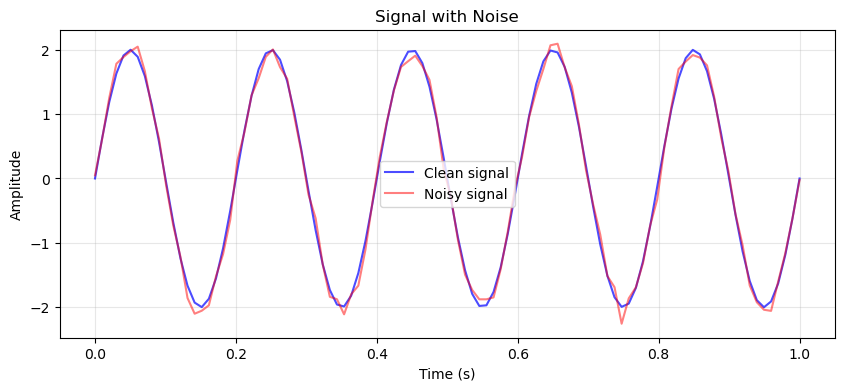

In [18]:
# Visualization
plt.figure(figsize=(10, 4))
plt.plot(t, clean_signal, 'b-', label='Clean signal', alpha=0.7)
plt.plot(t, noisy_signal, 'r-', label='Noisy signal', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with Noise')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Array Indexing and Slicing

Efficient data access is fundamental to NumPy programming. Understanding indexing and slicing allows you to extract and modify specific parts of arrays without loops.

### Basic Indexing

NumPy supports multiple indexing methods, each with specific use cases.

In [19]:
# 1D array indexing
arr_1d = np.array([10, 20, 30, 40, 50])

print(f"First element: {arr_1d[0]}")
print(f"Last element: {arr_1d[-1]}")
print(f"Middle elements: {arr_1d[1:4]}")

First element: 10
Last element: 50
Middle elements: [20 30 40]


In [20]:
# 2D array indexing
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

print(f"Element at (0,0): {arr_2d[0, 0]}")
print(f"First row: {arr_2d[0]}")
print(f"First column: {arr_2d[:, 0]}")
print(f"Sub-matrix:\n{arr_2d[0:2, 1:3]}")

Element at (0,0): 1
First row: [1 2 3]
First column: [1 4 7]
Sub-matrix:
[[2 3]
 [5 6]]


```{admonition} Warning: Exclusive End Index
:class: warning
Unlike MATLAB, NumPy's slice notation `[start:end]` excludes the end index. So `arr[1:4]` returns elements at indices 1, 2, and 3, but not 4.
```

### Boolean Indexing

Boolean masks allow you to select elements based on conditions, perfect for filtering data.

In [21]:
data = np.array([23, 45, 12, 67, 34, 89, 21])

# Create boolean mask
mask = data > 30
print(f"Boolean mask: {mask}")
print(f"Values > 30: {data[mask]}")

Boolean mask: [False  True False  True  True  True False]
Values > 30: [45 67 34 89]


In [22]:
# Multiple conditions
complex_mask = (data > 20) & (data < 50)
print(f"Values between 20 and 50: {data[complex_mask]}")

# Modify values using mask
data_copy = data.copy()
data_copy[data_copy > 50] = 50  # Cap values at 50
print(f"Capped array: {data_copy}")

Values between 20 and 50: [23 45 34 21]
Capped array: [23 45 12 50 34 50 21]


### Fancy Indexing

You can use arrays of indices to select specific elements in any order.

In [23]:
arr = np.array([10, 20, 30, 40, 50, 60])
indices = np.array([0, 2, 5])

print(f"Original array: {arr}")
print(f"Elements at indices {indices}: {arr[indices]}")

# Reorder elements
reordered = arr[[5, 3, 1, 0, 2, 4]]
print(f"Reordered: {reordered}")

Original array: [10 20 30 40 50 60]
Elements at indices [0 2 5]: [10 30 60]
Reordered: [60 40 20 10 30 50]


## Broadcasting and Vectorization

Broadcasting is NumPy's powerful mechanism for performing operations on arrays of different shapes. It eliminates the need for explicit loops and makes code both faster and more readable.

### Broadcasting Rules

NumPy compares array shapes element-wise from right to left. Two dimensions are compatible when they are equal or one of them is 1.

In [24]:
# Scalar and array
arr = np.array([1, 2, 3, 4])
result = arr + 10  # Scalar is broadcast to array shape
print(f"Array + scalar: {result}")

Array + scalar: [11 12 13 14]


In [25]:
# 1D and 2D arrays
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
row_vector = np.array([10, 20, 30])

# Row vector is broadcast to each row
result = matrix + row_vector
print(f"Matrix + row vector:\n{result}")

Matrix + row vector:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


In [26]:
# Column vector broadcasting
col_vector = np.array([[100], [200], [300]])
result = matrix + col_vector
print(f"Matrix + column vector:\n{result}")

Matrix + column vector:
[[101 102 103]
 [204 205 206]
 [307 308 309]]


```{admonition} Broadcasting Visualization
:class: tip
Think of broadcasting as "stretching" smaller arrays to match larger ones. A scalar stretches to fill any shape, a 1D array stretches along new dimensions, and dimensions of size 1 stretch to match corresponding dimensions.
```

### Vectorization Benefits

Vectorized operations are not just more concise—they're significantly faster than loops.

In [27]:
# Temperature conversion example
celsius = np.random.uniform(15, 35, 10000)  # 10000 temperature readings

In [28]:
# Loop approach (slow)
def convert_loop(celsius_arr):
    fahrenheit = []
    for c in celsius_arr:
        fahrenheit.append(c * 9/5 + 32)
    return np.array(fahrenheit)

start = time.time()
f_loop = convert_loop(celsius)
loop_time = time.time() - start

In [29]:
# Vectorized approach (fast)
start = time.time()
f_vector = celsius * 9/5 + 32
vector_time = time.time() - start

print(f"Loop time: {loop_time*1000:.2f} ms")
print(f"Vectorized time: {vector_time*1000:.2f} ms")
print(f"Speedup: {loop_time/vector_time:.0f}x")

Loop time: 1.21 ms
Vectorized time: 0.31 ms
Speedup: 4x


### Practical Broadcasting Example

Let's normalize data by subtracting the mean and dividing by the standard deviation for each feature.

In [30]:
# Sample data: 5 measurements, 3 features
data = np.array([[25, 100, 1.5],
                 [30, 110, 1.8],
                 [28, 105, 1.6],
                 [32, 115, 1.9],
                 [27, 108, 1.7]])

# Calculate statistics for each column
means = data.mean(axis=0)  # Mean of each column
stds = data.std(axis=0)    # Std of each column

print(f"Means: {means}")
print(f"Stds: {stds}")

Means: [ 28.4 107.6   1.7]
Stds: [2.42 5.   0.14]


In [31]:
# Normalize using broadcasting
normalized = (data - means) / stds

print(f"Normalized data:\n{normalized}")
print(f"\nVerify: new means ≈ 0: {normalized.mean(axis=0)}")
print(f"Verify: new stds ≈ 1: {normalized.std(axis=0)}")

Normalized data:
[[-1.41 -1.52 -1.41]
 [ 0.66  0.48  0.71]
 [-0.17 -0.52 -0.71]
 [ 1.49  1.48  1.41]
 [-0.58  0.08  0.  ]]

Verify: new means ≈ 0: [0. 0. 0.]
Verify: new stds ≈ 1: [1. 1. 1.]


## Working with Data

Real-world data requires cleaning, analysis, and transformation. NumPy provides comprehensive tools for these tasks, especially when dealing with numerical measurements and sensor data.

### Statistical Operations

NumPy includes a rich set of statistical functions for data analysis.

In [32]:
# Generate sample measurement data
np.random.seed(42)
measurements = np.random.normal(100, 15, 1000)  # Mean=100, std=15

# Basic statistics
print(f"Mean: {np.mean(measurements):.2f}")
print(f"Median: {np.median(measurements):.2f}")
print(f"Standard deviation: {np.std(measurements):.2f}")
print(f"Variance: {np.var(measurements):.2f}")

Mean: 100.29
Median: 100.38
Standard deviation: 14.68
Variance: 215.53


In [33]:
# Percentiles and quantiles
percentiles = np.percentile(measurements, [25, 50, 75])
print(f"Quartiles: {percentiles}")

# Identify outliers (values beyond 3 standard deviations)
mean = np.mean(measurements)
std = np.std(measurements)
outliers = np.abs(measurements - mean) > 3 * std
print(f"\nNumber of outliers: {np.sum(outliers)}")
print(f"Outlier percentage: {np.sum(outliers)/len(measurements)*100:.1f}%")

Quartiles: [ 90.29 100.38 109.72]

Number of outliers: 3
Outlier percentage: 0.3%


### Handling Missing Data

Sensor failures and communication errors often result in missing data. NumPy provides tools to handle these situations.

In [34]:
# Create data with missing values (NaN)
sensor_data = np.array([23.5, 24.1, np.nan, 23.8, 24.3, np.nan, 23.9])

print(f"Raw data: {sensor_data}")
print(f"Contains NaN: {np.isnan(sensor_data).any()}")
print(f"NaN locations: {np.where(np.isnan(sensor_data))[0]}")

Raw data: [23.5 24.1  nan 23.8 24.3  nan 23.9]
Contains NaN: True
NaN locations: [2 5]


In [35]:
# Handle missing values
# Option 1: Remove NaN values
clean_data = sensor_data[~np.isnan(sensor_data)]
print(f"After removing NaN: {clean_data}")

# Option 2: Replace with mean
data_copy = sensor_data.copy()
mean_value = np.nanmean(data_copy)  # Mean ignoring NaN
data_copy[np.isnan(data_copy)] = mean_value
print(f"After replacing with mean: {data_copy}")

After removing NaN: [23.5 24.1 23.8 24.3 23.9]
After replacing with mean: [23.5  24.1  23.92 23.8  24.3  23.92 23.9 ]


```{admonition} Tip: NaN-aware Functions
:class: tip
Use NumPy's NaN-aware functions like `np.nanmean()`, `np.nanstd()`, and `np.nansum()` to perform calculations while ignoring missing values.
```

### Data Transformation

Engineering data often requires transformation for analysis or visualization.

In [36]:
# Logarithmic scaling for wide-range data
resistance = np.array([10, 100, 1000, 10000, 100000])  # Ohms
log_resistance = np.log10(resistance)

print(f"Linear scale: {resistance}")
print(f"Log scale: {log_resistance}")

Linear scale: [    10    100   1000  10000 100000]
Log scale: [1. 2. 3. 4. 5.]


In [37]:
# Decibel conversion for signal processing
power_watts = np.array([0.001, 0.01, 0.1, 1, 10])
power_dbm = 10 * np.log10(power_watts * 1000)  # Convert to dBm

print(f"Power (W): {power_watts}")
print(f"Power (dBm): {power_dbm}")

Power (W): [ 0.    0.01  0.1   1.   10.  ]
Power (dBm): [ 0. 10. 20. 30. 40.]


### Exercise 2: Data Analysis and Cleaning

Temperature sensors in industrial monitoring systems can fail or report erroneous values due to electrical interference, communication errors, or hardware malfunctions. In this exercise, you'll detect and correct these errors using validation rules and interpolation.

**Hint:** Use `np.random.seed(42)` before generating noise to make your results reproducible.

Create 24 hours of temperature data that follows a realistic daily pattern using a sine wave. Start with `np.arange(24)` for hours and generate base temperatures using `20 + 10*np.sin((hours - 6) * np.pi / 12)` to simulate cooler nights and warmer afternoons. Add small random noise with `np.random.normal(0, 1, 24)`. Then inject three types of errors: set index 5 to 100°C and index 10 to -50°C to simulate sensor failures, and at index 15, add 8°C to the previous value to create a sudden jump.

In [39]:
# Create sample data with errors
np.random.seed(42)
hours = np.arange(24)
# Normal temperatures with daily pattern
temps = 20 + 10*np.sin((hours - 6) * np.pi / 12) + np.random.normal(0, 1, 24)

# Inject errors
temps[5] = 100  # Sensor error
temps[10] = -50  # Sensor error
temps[15] = temps[14] + 8  # Sudden jump

print(f"Raw data: {temps[:12]}...")  # Show first half

Raw data: [ 10.5   10.2   11.99  14.45  14.77 100.    21.58  23.36  24.53  27.61
 -50.    29.19]...


Detect two types of problems in the temperature data. First, find out-of-range values by checking where temperatures fall below -10°C or above 45°C. Second, identify sudden changes by calculating the absolute difference between consecutive values using `np.abs(np.diff(temps))` and finding where this exceeds 5°C. Since `diff()` returns an array one element shorter, create a boolean array for sudden changes that matches the original length, marking both the jumping point and the point after it as problematic.

**Hint:** Combine both problem types using the `|` (OR) operator to create a single mask of all problematic indices.

In [40]:
# Identify problems
# Check range
out_of_range = (temps < -10) | (temps > 45)

# Check rate of change
rate_of_change = np.abs(np.diff(temps))
sudden_changes = np.zeros(24, dtype=bool)
sudden_changes[1:] = rate_of_change > 5

# Combine problems
problematic = out_of_range | sudden_changes

print(f"Problematic indices: {np.where(problematic)[0]}")

Problematic indices: [ 5  6 10 11 15 16]


Create a cleaned copy of your temperature array. Use `np.interp()` to replace problematic values with linearly interpolated values from the surrounding valid data points. You'll need three arrays for interpolation: the x-coordinates of points to interpolate (problematic indices), the x-coordinates of known good points (valid indices), and the y-values at those good points (valid temperatures). Compare the mean and standard deviation of the raw and cleaned data to see how outliers affected the statistics.

**Hint:** Use `np.where()` to get indices: `valid_indices = np.where(~problematic)[0]` and `invalid_indices = np.where(problematic)[0]`.

In [41]:
# Clean data using interpolation
cleaned = temps.copy()
valid_indices = np.where(~problematic)[0]
invalid_indices = np.where(problematic)[0]

# Interpolate invalid values
cleaned[invalid_indices] = np.interp(invalid_indices, 
                                     valid_indices, 
                                     temps[valid_indices])

# Compare statistics
print(f"Raw data - Mean: {np.mean(temps):.1f}, Std: {np.std(temps):.1f}")
print(f"Cleaned - Mean: {np.mean(cleaned):.1f}, Std: {np.std(cleaned):.1f}")

Raw data - Mean: 20.4, Std: 22.8
Cleaned - Mean: 19.8, Std: 6.8


Optional: Create a plot that clearly shows the data cleaning effect. Plot the raw data with markers and lines in one color with reduced opacity, then overlay the cleaned data in another color. Mark the problematic values with large 'X' markers to highlight which points were corrected. Add a legend distinguishing between raw data, cleaned data, and identified errors. This visualization should make it immediately clear where errors occurred and how interpolation smoothed them out.

**Hint:** Use `plt.scatter()` to mark the problematic points.

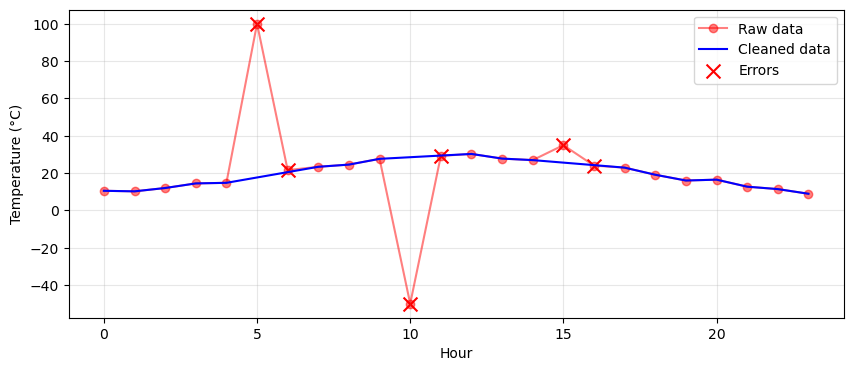

In [42]:
# Visualize
plt.figure(figsize=(10, 4))
plt.plot(hours, temps, 'ro-', label='Raw data', alpha=0.5)
plt.plot(hours, cleaned, 'b-', label='Cleaned data')
plt.scatter(invalid_indices, temps[invalid_indices], 
           c='red', s=100, marker='x', label='Errors')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Linear Algebra

Linear algebra is fundamental to engineering computations, from solving systems of equations to analyzing circuits and control systems. NumPy provides comprehensive linear algebra capabilities through its `linalg` module.

### Matrix Operations

Understanding the difference between element-wise and matrix operations is crucial.

In [43]:
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])

# Element-wise multiplication
elementwise = A * B
print(f"Element-wise multiplication:\n{elementwise}")

# Matrix multiplication
matrix_mult = A @ B  # or np.dot(A, B)
print(f"\nMatrix multiplication:\n{matrix_mult}")

Element-wise multiplication:
[[ 5 12]
 [21 32]]

Matrix multiplication:
[[19 22]
 [43 50]]


In [44]:
# Matrix properties
print(f"Transpose:\n{A.T}")
print(f"\nDeterminant: {np.linalg.det(A):.2f}")
print(f"\nInverse:\n{np.linalg.inv(A)}")

Transpose:
[[1 3]
 [2 4]]

Determinant: -2.00

Inverse:
[[-2.   1. ]
 [ 1.5 -0.5]]


In [45]:
# Verify inverse property: A @ A^(-1) = I
A_inv = np.linalg.inv(A)
identity = A @ A_inv
print(f"A @ A^(-1) =\n{identity}")
print(f"\nIs identity? {np.allclose(identity, np.eye(2))}")

A @ A^(-1) =
[[1. 0.]
 [0. 1.]]

Is identity? True


### Solving Linear Systems

Many engineering problems reduce to solving systems of linear equations: Ax = b

In [46]:
# Example: Circuit analysis with Kirchhoff's laws
# 3 equations, 3 unknowns (currents)
# Coefficient matrix (from circuit equations)
A = np.array([[2, -1, 0],
              [-1, 3, -1],
              [0, -1, 2]])

# Right-hand side (voltage sources)
b = np.array([1, 0, -1])

# Solve for currents
currents = np.linalg.solve(A, b)
print(f"Currents: {currents}")

Currents: [ 0.5  0.  -0.5]


In [47]:
# Verify solution
verification = A @ currents
print(f"A @ x = {verification}")
print(f"b = {b}")
print(f"Solution correct? {np.allclose(verification, b)}")

A @ x = [ 1.  0. -1.]
b = [ 1  0 -1]
Solution correct? True


```{admonition} Performance Note
:class: note
`np.linalg.solve()` is more efficient and numerically stable than computing the inverse and multiplying: `x = inv(A) @ b`. Always prefer `solve()` for linear systems.
```

### Eigenvalues and Eigenvectors

Eigenanalysis is crucial for stability analysis, principal component analysis, and vibration problems.

In [48]:
# System matrix (e.g., from state-space representation)
M = np.array([[4, -2],
              [1, 1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(M)

print(f"Eigenvalues: {eigenvalues}")
print(f"\nEigenvectors:\n{eigenvectors}")

Eigenvalues: [3. 2.]

Eigenvectors:
[[0.89 0.71]
 [0.45 0.71]]


In [49]:
# Verify eigenvalue equation: M @ v = λ @ v
for i in range(len(eigenvalues)):
    λ = eigenvalues[i]
    v = eigenvectors[:, i]
    
    lhs = M @ v
    rhs = λ * v
    
    print(f"Eigenvalue {i+1}: {λ:.2f}")
    print(f"  M @ v = {lhs}")
    print(f"  λ * v = {rhs}")
    print(f"  Match? {np.allclose(lhs, rhs)}")

Eigenvalue 1: 3.00
  M @ v = [2.68 1.34]
  λ * v = [2.68 1.34]
  Match? True
Eigenvalue 2: 2.00
  M @ v = [1.41 1.41]
  λ * v = [1.41 1.41]
  Match? True


## Complex Numbers for Engineering

Complex numbers are essential for AC circuit analysis, signal processing, and control systems. NumPy provides native support for complex arithmetic, making phasor calculations and frequency domain analysis straightforward.

### Complex Arithmetic Basics

In [50]:
# Creating complex numbers
z1 = 3 + 4j  # Rectangular form
z2 = complex(3, 4)  # Using complex()
z3 = np.exp(1j * np.pi/4)  # From Euler's formula

print(f"z1 = {z1}")
print(f"z2 = {z2}")
print(f"z3 = {z3:.3f}")

z1 = (3+4j)
z2 = (3+4j)
z3 = 0.707+0.707j


In [51]:
# Complex number properties
z = 3 + 4j

print(f"Real part: {z.real}")
print(f"Imaginary part: {z.imag}")
print(f"Magnitude: {np.abs(z)}")
print(f"Phase (radians): {np.angle(z):.3f}")
print(f"Phase (degrees): {np.angle(z, deg=True):.1f}")
print(f"Conjugate: {np.conj(z)}")

Real part: 3.0
Imaginary part: 4.0
Magnitude: 5.0
Phase (radians): 0.927
Phase (degrees): 53.1
Conjugate: (3-4j)


### AC Circuit Analysis

Complex numbers simplify AC circuit calculations by representing impedances and phasors.

In [52]:
# Circuit components at 60 Hz
f = 60  # Hz
ω = 2 * np.pi * f  # Angular frequency

# Component values
R = 100  # Ohms
L = 0.1  # Henries
C = 10e-6  # Farads

# Complex impedances
Z_R = R  # Resistor
Z_L = 1j * ω * L  # Inductor
Z_C = -1j / (ω * C)  # Capacitor

print(f"Resistor: {Z_R:.1f} Ω")
print(f"Inductor: {Z_L:.1f} Ω")
print(f"Capacitor: {Z_C:.1f} Ω")

Resistor: 100.0 Ω
Inductor: 0.0+37.7j Ω
Capacitor: -0.0-265.3j Ω


In [53]:
# Series RLC circuit
Z_total = Z_R + Z_L + Z_C

print(f"Total impedance: {Z_total:.1f} Ω")
print(f"Magnitude: {np.abs(Z_total):.1f} Ω")
print(f"Phase angle: {np.angle(Z_total, deg=True):.1f}°")

# Current calculation with voltage source
V = 120  # Volts RMS
I = V / Z_total
print(f"\nCurrent: {np.abs(I):.3f} A at {np.angle(I, deg=True):.1f}°")

Total impedance: 100.0-227.6j Ω
Magnitude: 248.6 Ω
Phase angle: -66.3°

Current: 0.483 A at 66.3°


### Power Calculations

Complex power elegantly represents the relationship between real and reactive power.

In [54]:
# Voltage and current phasors
V_phasor = 230 * np.exp(1j * 0)  # Reference angle
I_phasor = 10 * np.exp(1j * np.radians(-30))  # 30° lagging

# Complex power S = V * I*
S = V_phasor * np.conj(I_phasor)

print(f"Complex power: {S:.1f} VA")
print(f"Real power (P): {S.real:.1f} W")
print(f"Reactive power (Q): {S.imag:.1f} VAR")
print(f"Apparent power (|S|): {np.abs(S):.1f} VA")
print(f"Power factor: {S.real/np.abs(S):.3f}")

Complex power: 1991.9+1150.0j VA
Real power (P): 1991.9 W
Reactive power (Q): 1150.0 VAR
Apparent power (|S|): 2300.0 VA
Power factor: 0.866


```{admonition} MATLAB Note: Complex Numbers
:class: note
Python uses `j` for the imaginary unit (following electrical engineering convention), while MATLAB uses `i`. Both `3+4j` and `complex(3,4)` create complex numbers in Python.
```

### Exercise 3: Three-Phase Power Analysis

A balanced three-phase system has line voltage of 400V and supplies a load with impedance Z = 10 + 5j Ω per phase. Calculate the line currents, phase currents, and total three-phase power. Assume a Y-connected load.

Display the three phase currents as phasors (magnitude and angle) and calculate the total real and reactive power consumed.

**Hint:** In a balanced Y-connection, phase voltage = line voltage / √3, and the three phases are 120° apart.

In [55]:
# Exercise 3: Your code here

### Solution to Exercise 3

In [56]:
# System parameters
V_line = 400  # Line voltage (V)
Z_load = 10 + 5j  # Load impedance per phase (Ω)

# Calculate phase voltage (Y-connection)
V_phase = V_line / np.sqrt(3)

# Create three-phase voltage phasors (120° apart)
V_a = V_phase * np.exp(1j * 0)  # Phase A reference
V_b = V_phase * np.exp(1j * np.radians(-120))  # Phase B
V_c = V_phase * np.exp(1j * np.radians(120))   # Phase C

print(f"Phase voltages (V):")
print(f"  V_a: {np.abs(V_a):.1f} ∠ {np.angle(V_a, deg=True):.1f}°")
print(f"  V_b: {np.abs(V_b):.1f} ∠ {np.angle(V_b, deg=True):.1f}°")
print(f"  V_c: {np.abs(V_c):.1f} ∠ {np.angle(V_c, deg=True):.1f}°")

Phase voltages (V):
  V_a: 230.9 ∠ 0.0°
  V_b: 230.9 ∠ -120.0°
  V_c: 230.9 ∠ 120.0°


In [57]:
# Calculate phase currents (I = V/Z)
I_a = V_a / Z_load
I_b = V_b / Z_load
I_c = V_c / Z_load

print(f"\nPhase currents (A):")
print(f"  I_a: {np.abs(I_a):.2f} ∠ {np.angle(I_a, deg=True):.1f}°")
print(f"  I_b: {np.abs(I_b):.2f} ∠ {np.angle(I_b, deg=True):.1f}°")
print(f"  I_c: {np.abs(I_c):.2f} ∠ {np.angle(I_c, deg=True):.1f}°")

# In Y-connection, line current = phase current
print(f"\nNote: Line currents equal phase currents in Y-connection")


Phase currents (A):
  I_a: 20.66 ∠ -26.6°
  I_b: 20.66 ∠ -146.6°
  I_c: 20.66 ∠ 93.4°

Note: Line currents equal phase currents in Y-connection


In [58]:
# Calculate power per phase
S_a = V_a * np.conj(I_a)
S_b = V_b * np.conj(I_b)
S_c = V_c * np.conj(I_c)

# Total three-phase power
S_total = S_a + S_b + S_c

print(f"\nPower per phase:")
print(f"  Phase A: P={S_a.real:.1f} W, Q={S_a.imag:.1f} VAR")
print(f"\nTotal three-phase power:")
print(f"  Real power: {S_total.real:.1f} W")
print(f"  Reactive power: {S_total.imag:.1f} VAR")
print(f"  Apparent power: {np.abs(S_total):.1f} VA")
print(f"  Power factor: {S_total.real/np.abs(S_total):.3f}")


Power per phase:
  Phase A: P=4266.7 W, Q=2133.3 VAR

Total three-phase power:
  Real power: 12800.0 W
  Reactive power: 6400.0 VAR
  Apparent power: 14310.8 VA
  Power factor: 0.894


## Power Systems Applications

Now let's apply everything we've learned to solve realistic power system problems. These examples demonstrate how NumPy's capabilities come together for practical engineering analysis.

### Power Flow Calculation

A simplified DC power flow demonstrates matrix operations and system solving.

In [59]:
# 3-bus system susceptance matrix (simplified)
B = np.array([[-20, 10, 10],
              [10, -25, 15],
              [10, 15, -25]])

# Remove slack bus (bus 0) for calculation
B_reduced = B[1:, 1:]

# Power injections at buses 1 and 2 (MW)
P = np.array([-50, 30])  # Negative = load, Positive = generation

# Solve for voltage angles: B * θ = P
theta = np.linalg.solve(B_reduced, P)

# Include slack bus (reference angle = 0)
theta_all = np.insert(theta, 0, 0)

print(f"Bus voltage angles (radians):")
for i, angle in enumerate(theta_all):
    print(f"  Bus {i}: {angle:.4f} rad ({np.degrees(angle):.2f}°)")

Bus voltage angles (radians):
  Bus 0: 0.0000 rad (0.00°)
  Bus 1: 2.0000 rad (114.59°)
  Bus 2: -0.0000 rad (-0.00°)


In [60]:
# Calculate line flows
# Flow from bus i to j: P_ij = B_ij * (θ_i - θ_j)
flows = {}
for i in range(3):
    for j in range(i+1, 3):
        if B[i, j] != 0:
            flow = -B[i, j] * (theta_all[i] - theta_all[j])
            flows[f"Line {i}-{j}"] = flow

print(f"\nLine flows (MW):")
for line, flow in flows.items():
    print(f"  {line}: {flow:.2f} MW")


Line flows (MW):
  Line 0-1: 20.00 MW
  Line 0-2: -0.00 MW
  Line 1-2: -30.00 MW


### Harmonic Analysis

Analyzing harmonic content in power systems using FFT.

In [61]:
# Generate distorted current waveform
t = np.linspace(0, 0.1, 1000)  # 0.1 seconds, 1000 samples
f0 = 50  # Fundamental frequency (Hz)

# Current with harmonics (typical for nonlinear load)
i_fundamental = 100 * np.sin(2*np.pi*f0*t)
i_3rd = 30 * np.sin(2*np.pi*3*f0*t)  # 3rd harmonic
i_5th = 20 * np.sin(2*np.pi*5*f0*t)  # 5th harmonic
i_7th = 10 * np.sin(2*np.pi*7*f0*t)  # 7th harmonic

i_total = i_fundamental + i_3rd + i_5th + i_7th

In [62]:
# Perform FFT
fft_result = np.fft.fft(i_total)
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])

# Get positive frequencies only
positive_freq_idx = frequencies > 0
frequencies = frequencies[positive_freq_idx]
magnitudes = np.abs(fft_result[positive_freq_idx]) * 2 / len(t)

# Find harmonics
harmonic_indices = []
for h in [1, 3, 5, 7]:
    idx = np.argmin(np.abs(frequencies - h*f0))
    harmonic_indices.append(idx)

print(f"Harmonic content:")
for h, idx in zip([1, 3, 5, 7], harmonic_indices):
    magnitude = magnitudes[idx]
    percentage = magnitude / magnitudes[harmonic_indices[0]] * 100
    print(f"  {h}th harmonic: {magnitude:.1f} A ({percentage:.1f}%)")

Harmonic content:
  1th harmonic: 100.0 A (100.0%)
  3th harmonic: 29.9 A (30.0%)
  5th harmonic: 19.9 A (19.9%)
  7th harmonic: 9.9 A (9.9%)


In [70]:
# Calculate Total Harmonic Distortion (THD)
fundamental = magnitudes[harmonic_indices[0]]
harmonics = magnitudes[harmonic_indices[1:]]
THD = np.sqrt(np.sum(harmonics**2)) / fundamental * 100

print(f"\nTotal Harmonic Distortion: {THD:.1f}%")


Total Harmonic Distortion: 37.3%


### Load Forecasting Data Preparation

Preparing time-series data for machine learning models.

In [71]:
# Generate synthetic load data
np.random.seed(42)
days = 30
hours_per_day = 24
total_hours = days * hours_per_day

# Base load with daily and weekly patterns
time = np.arange(total_hours)
daily_pattern = 500 + 200*np.sin(2*np.pi*time/24 - np.pi/2)
weekly_pattern = 50*np.sin(2*np.pi*time/(24*7))
noise = np.random.normal(0, 30, total_hours)

load = daily_pattern + weekly_pattern + noise
load = np.maximum(load, 300)  # Minimum load constraint

In [72]:
# Create features for forecasting
# Lag features
lag_1h = np.roll(load, 1)
lag_24h = np.roll(load, 24)
lag_168h = np.roll(load, 168)  # 1 week

# Time features
hour_of_day = time % 24
day_of_week = (time // 24) % 7

# Moving averages
ma_24h = np.convolve(load, np.ones(24)/24, mode='same')

# Combine features (skip first week to avoid edge effects)
start_idx = 168
features = np.column_stack([
    lag_1h[start_idx:],
    lag_24h[start_idx:],
    lag_168h[start_idx:],
    hour_of_day[start_idx:],
    day_of_week[start_idx:],
    ma_24h[start_idx:]
])
target = load[start_idx:]

print(f"Feature matrix shape: {features.shape}")
print(f"Features: lag_1h, lag_24h, lag_168h, hour, day, ma_24h")
print(f"\nFirst sample:")
print(f"  Features: {features[0]}")
print(f"  Target: {target[0]:.1f} MW")

Feature matrix shape: (552, 6)
Features: lag_1h, lag_24h, lag_168h, hour, day, ma_24h

First sample:
  Features: [361.85 300.   314.9    0.     0.   510.78]
  Target: 300.0 MW


## Troubleshooting and Best Practices

Understanding common errors and best practices will save you debugging time and improve code performance.

### Common Errors and Solutions

```{admonition} Common NumPy Errors
:class: warning
1. **Shape mismatch**: Arrays must have compatible shapes for operations
2. **Type errors**: Mixing incompatible data types
3. **Memory errors**: Creating arrays too large for available RAM
4. **Indexing errors**: Using out-of-bounds indices
5. **Broadcasting errors**: Incompatible dimensions for broadcasting
```

In [73]:
# Shape mismatch example and solution
a = np.array([[1, 2, 3]])
b = np.array([[4], [5], [6]])

print(f"a shape: {a.shape} (1×3)")
print(f"b shape: {b.shape} (3×1)")

# This would error: a + b.T (shapes (1,3) and (1,3) don't broadcast)
# Solution: Use proper shapes
result = a + b  # Broadcasting works: (1,3) + (3,1) → (3,3)
print(f"\nResult shape: {result.shape}")
print(f"Result:\n{result}")

a shape: (1, 3) (1×3)
b shape: (3, 1) (3×1)

Result shape: (3, 3)
Result:
[[5 6 7]
 [6 7 8]
 [7 8 9]]


In [74]:
# Type compatibility
int_array = np.array([1, 2, 3], dtype=np.int32)
float_array = np.array([1.5, 2.5, 3.5])

# Mixed operations convert to higher precision
result = int_array + float_array
print(f"Result dtype: {result.dtype}")
print(f"Result: {result}")

Result dtype: float64
Result: [2.5 4.5 6.5]


### Memory Optimization

In [75]:
# Choose appropriate data types
# Default float64 (8 bytes per element)
large_default = np.ones((1000, 1000))
print(f"Default (float64): {large_default.nbytes / 1e6:.1f} MB")

# Using float32 (4 bytes per element)
large_float32 = np.ones((1000, 1000), dtype=np.float32)
print(f"Float32: {large_float32.nbytes / 1e6:.1f} MB")

# For integers with limited range
small_ints = np.array([1, 2, 3, 4, 5], dtype=np.int8)
print(f"\nInt8 range: {np.iinfo(np.int8).min} to {np.iinfo(np.int8).max}")

Default (float64): 8.0 MB
Float32: 4.0 MB

Int8 range: -128 to 127


### Performance Tips

In [76]:
import time 

# Preallocate arrays instead of growing them
n = 10000

# Slow: Growing array
start = time.time()
result_slow = np.array([])
for i in range(n):
    result_slow = np.append(result_slow, i**2)
slow_time = time.time() - start

# Fast: Preallocated
start = time.time()
result_fast = np.zeros(n)
for i in range(n):
    result_fast[i] = i**2
fast_time = time.time() - start

# Fastest: Vectorized
start = time.time()
result_fastest = np.arange(n)**2
fastest_time = time.time() - start

print(f"Growing array: {slow_time*1000:.1f} ms")
print(f"Preallocated: {fast_time*1000:.1f} ms")
print(f"Vectorized: {fastest_time*1000:.1f} ms")

Growing array: 15.6 ms
Preallocated: 0.6 ms
Vectorized: 0.1 ms


```{admonition} Best Practices Summary
:class: tip
1. **Vectorize operations** - Avoid loops when possible
2. **Preallocate arrays** - Don't grow arrays incrementally
3. **Use appropriate dtypes** - Save memory with smaller types
4. **Profile before optimizing** - Measure to find bottlenecks
5. **Use views carefully** - Remember slices are views, not copies
6. **Check shapes** - Use `.shape` liberally when debugging
7. **Handle NaN explicitly** - Use nan-aware functions
8. **Document array dimensions** - Comment expected shapes
```

## Summary

You've mastered NumPy's essential capabilities for scientific and engineering computing. From basic array operations to complex linear algebra and signal processing, you now have the tools to tackle numerical problems efficiently.

Key concepts covered include array creation and manipulation, broadcasting for efficient operations without loops, statistical analysis and data cleaning, linear algebra for system solving, complex numbers for AC analysis, and practical applications to power systems. You've also learned crucial performance optimizations and common pitfalls to avoid.

NumPy forms the foundation for scientific Python. The skills you've developed here directly transfer to specialized libraries like SciPy for advanced mathematics, Pandas for data analysis, and scikit-learn for machine learning. Whether you're analyzing measurement data, solving circuit equations, or processing signals, NumPy provides the computational power you need.

```{admonition} Next Steps
:class: tip
Practice these concepts with your own data and explore NumPy's extensive documentation for specialized functions. Consider learning SciPy for advanced scientific computing and Pandas for structured data analysis.
```